In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import ssm
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import scipy
import scipy.io
import tsfresh
import dtale
import os
px.set_mapbox_access_token("pk.eyJ1IjoibWlrb2xhanNsdXBpbnNraSIsImEiOiJjazJ5dDI0MWEwOTA3M2hxanRwbmo4NDRuIn0.NSbj3B1Bm6fC5QUP3s-BjQ")
import plotly.io as pio
pio.renderers.default = "iframe"
import dask
from lib.huawei import load_data, load_motion, load_ambient, load_battery, load_api, load_label
import tables
from ssm.util import random_rotation, find_permutation
import logging
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
logging.basicConfig(filename='huawei_hmm.log', level=logging.DEBUG)

In [3]:
MODELS_PATH = "../Models/hmm_parallel/"

In [4]:
data = np.load("../Data/huawei-competition/raw.npy")

In [5]:
labels = np.load("../Data/huawei-competition/resampled/Label.npy")[:,-1].astype(int) - 1

In [6]:
order = np.loadtxt("../Data/huawei-competition/train_order.txt").astype(int)

In [7]:
data_ordered = np.zeros(data.shape)

In [8]:
data_ordered[order - 1, :] = data

In [9]:
labels_ordered = np.zeros(labels.shape)
labels_ordered[order - 1] = labels

In [10]:
n = int(data_ordered.shape[0]*0.25)
m = int(data_ordered.shape[0]*0.5)
X_train = data_ordered[m:]
y_train = labels_ordered[m:]
X_val = data_ordered[:n]
y_val = labels_ordered[:n]
X_test = data_ordered[n:m]
y_test = labels_ordered[n:m]

In [11]:
def load_model(path):
    with open(path, "rb") as ifile:
        model_dic = pickle.load(ifile)
    return model_dic

In [12]:
models_dic = {}
for f in os.listdir(MODELS_PATH):
    if "raw" not in f:
        continue
    models_dic[f] = load_model(os.path.join(MODELS_PATH, f))

In [13]:
np.unique(y_train, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 array([1176,  949,  338, 1110, 1195,  993, 1455,  939]))

In [14]:
def plot_states(data_z, z_est, label, prefix):
    titles = ["True", label]
    states_list = [data_z, z_est]
    fig, axs = plt.subplots(2,1, figsize=(6,4))
    for (i, ax, states) in zip(range(len(axs)), axs, states_list):
        ax.imshow(states[None,:], aspect="auto")
        ax.set_yticks([])
        ax.set_title(titles[i])
        if i < (len(axs) - 1):
            ax.set_xticks([])

    plt.suptitle(f"{titles[0]} and {titles[1]}", va="baseline")
    plt.tight_layout()
    plt.savefig(f"../Plots/hmm/{prefix}_{titles[0]}_{titles[1]}.pdf")
    plt.show()

In [15]:
# from collections import defaultdict
mutual_informations = {}

huawei_raw_hmm_standard_diagonal_gaussian_10000_10000_random


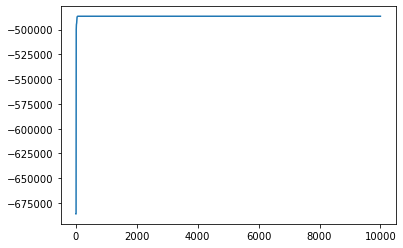

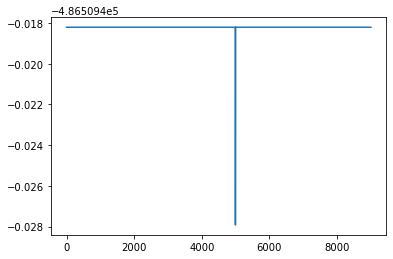

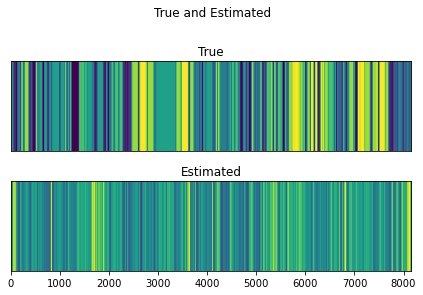

0.15144083384426732


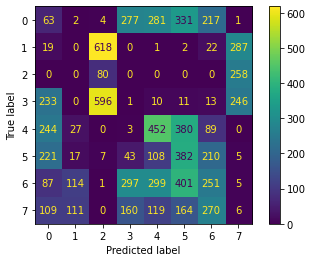

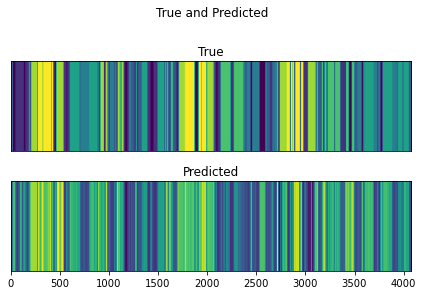

0.2958057395143488


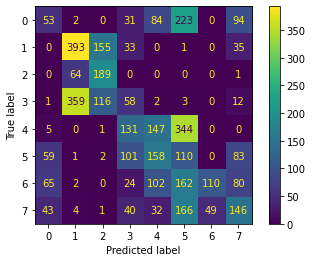

huawei_raw_hmm_standard_diagonal_gaussian_10000_10000_kmeans


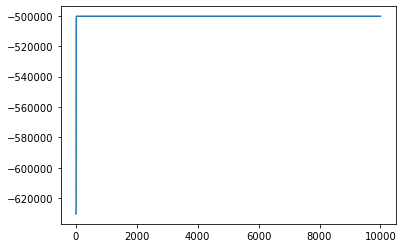

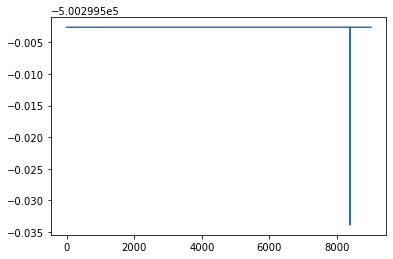

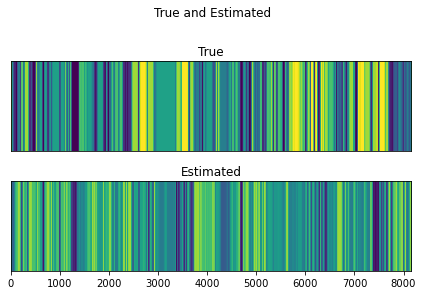

0.09307173513182097


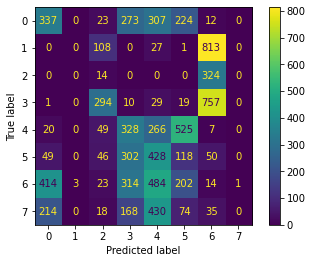

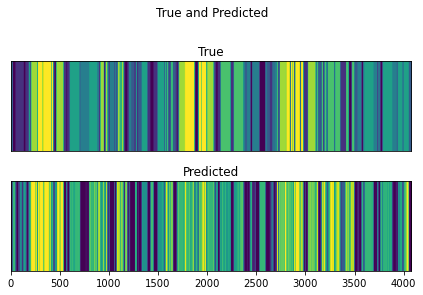

0.257542310522443


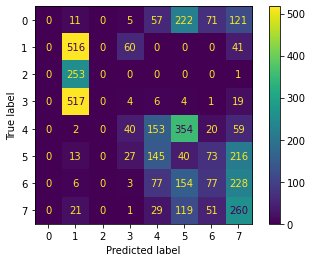

huawei_raw_hmm_recurrent_gaussian_10000_10000_random


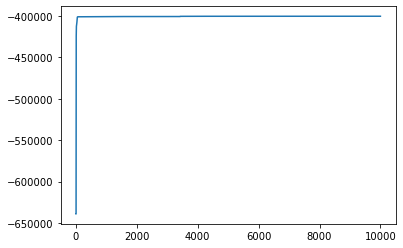

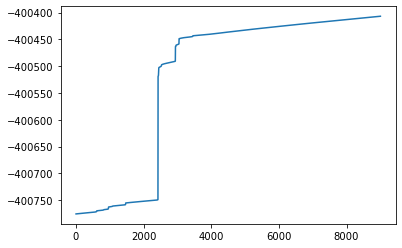

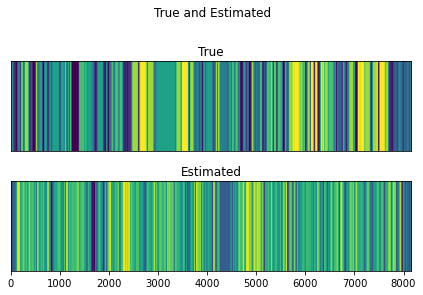

0.0727161250766401


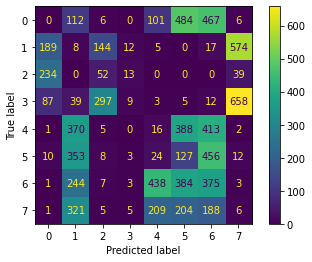

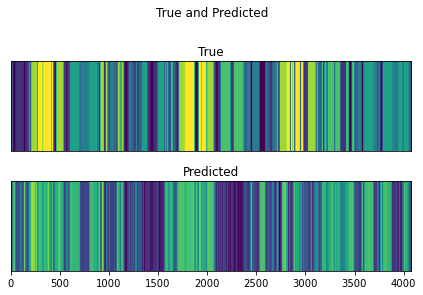

0.2862398822663723


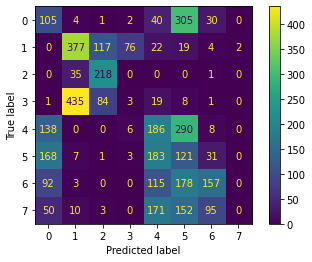

huawei_raw_hmm_standard_no_input_ar_10000_10000_random


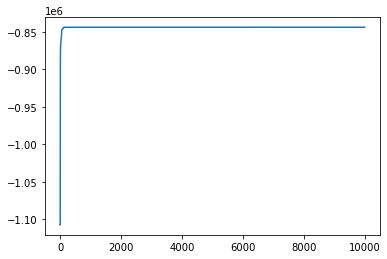

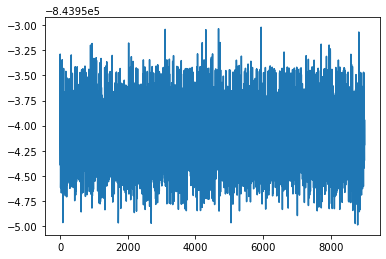

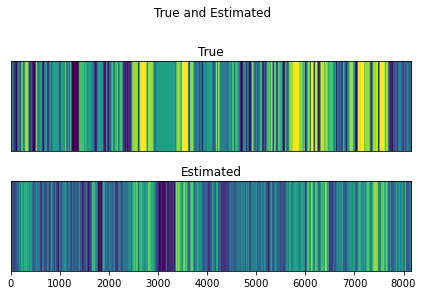

0.21594114040465973


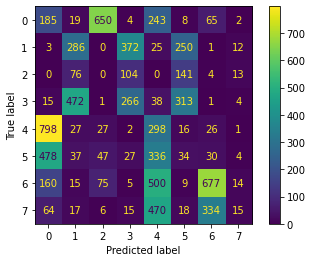

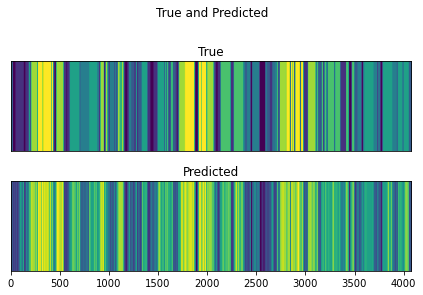

0.4277655138582291


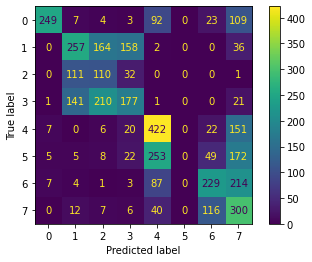

huawei_raw_hmm_standard_autoregressive_10000_10000_random


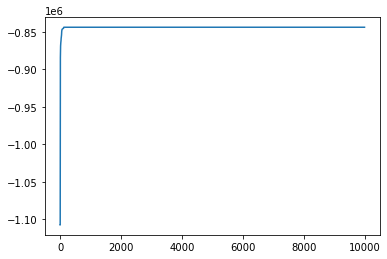

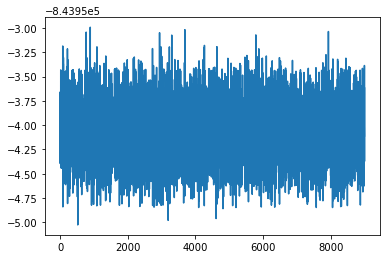

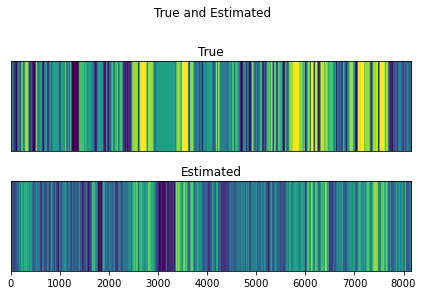

0.21594114040465973


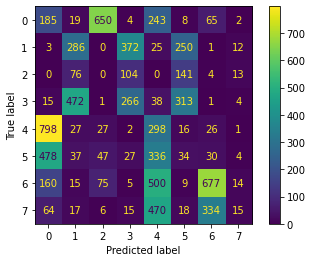

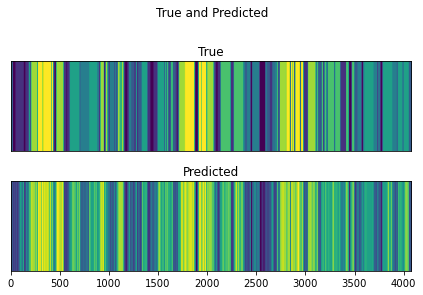

0.4277655138582291


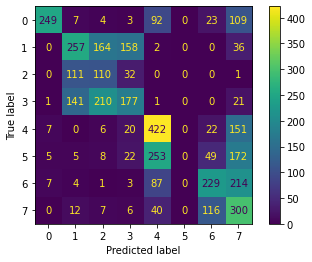

huawei_raw_hmm_standard_diagonal_ar_10000_10000_random


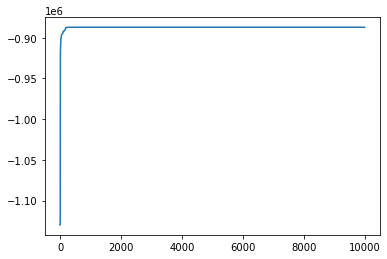

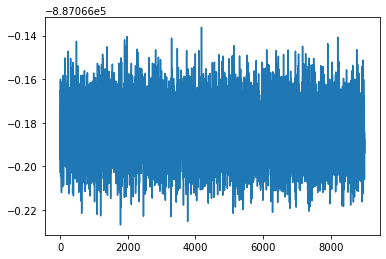

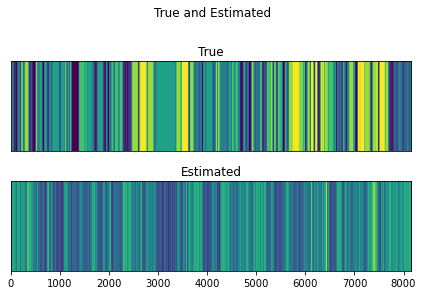

0.10251379521765788


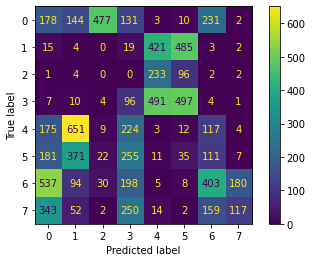

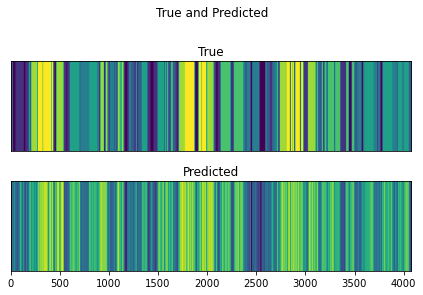

0.39072847682119205


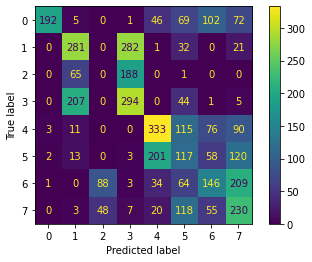

huawei_raw_hmm_recurrent_diagonal_ar_10000_10000_random


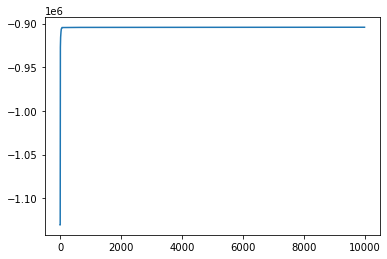

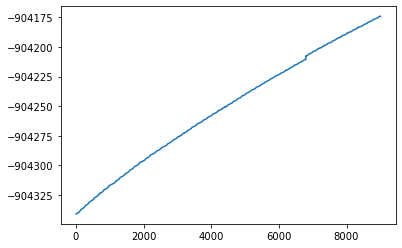

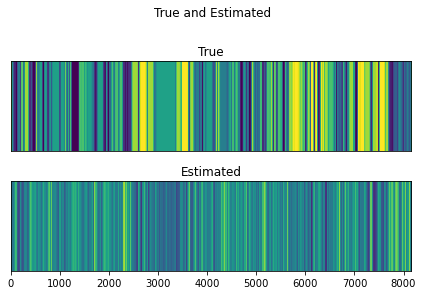

0.08313917841814837


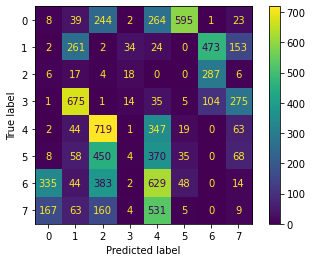

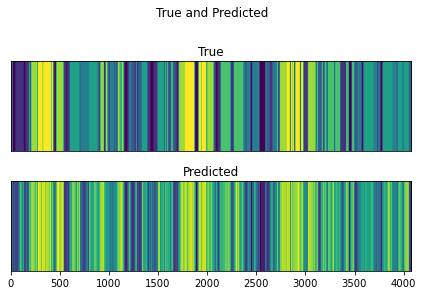

0.43782192788815305


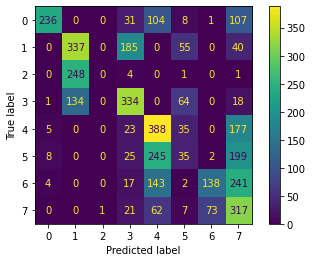

huawei_raw_hmm_recurrent_autoregressive_10000_10000_random


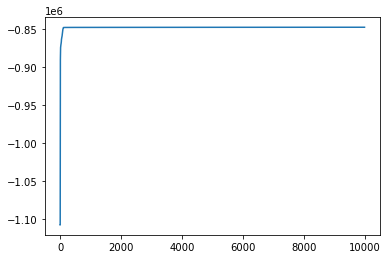

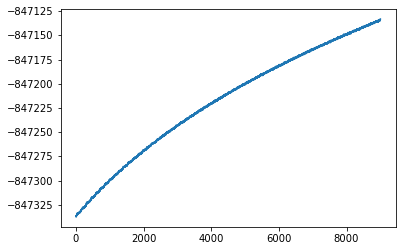

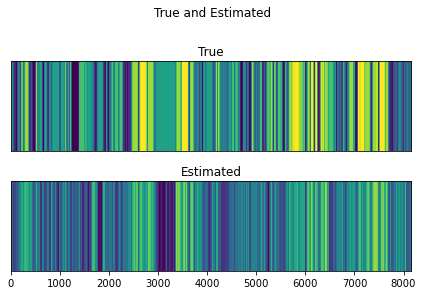

0.22011036174126303


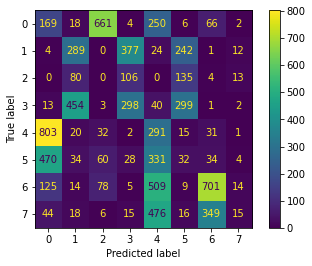

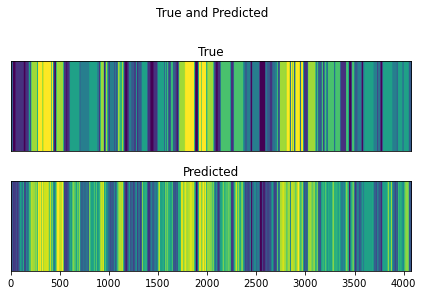

0.4324258032867304


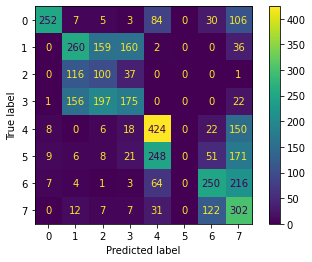

huawei_raw_hmm_recurrent_no_input_ar_10000_10000_random


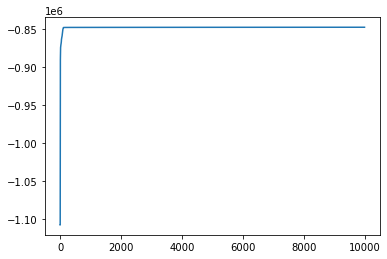

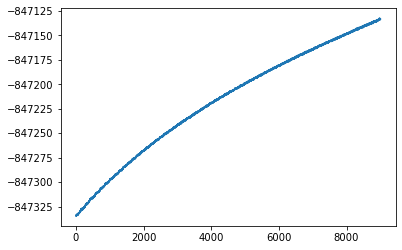

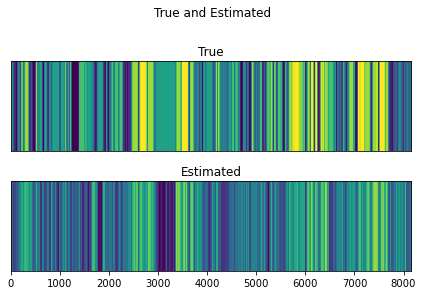

0.22011036174126303


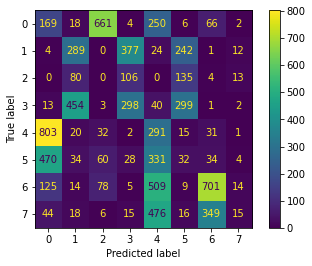

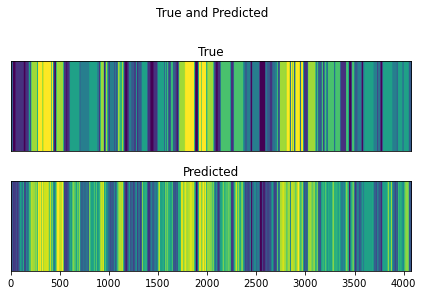

0.4324258032867304


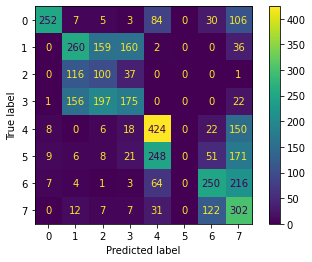

huawei_raw_hmm_recurrent_gaussian_10000_10000_kmeans


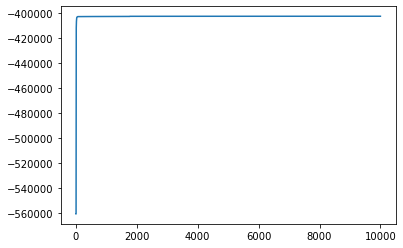

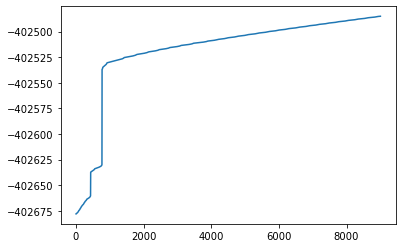

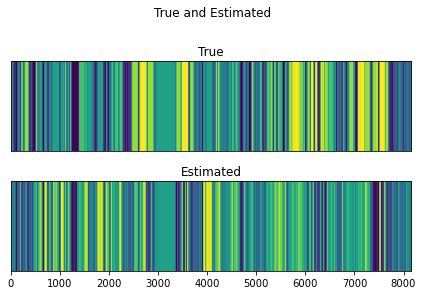

0.22673206621704475


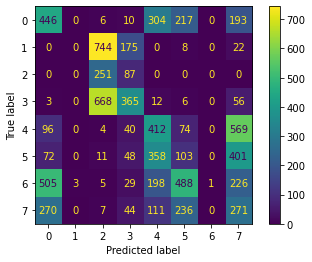

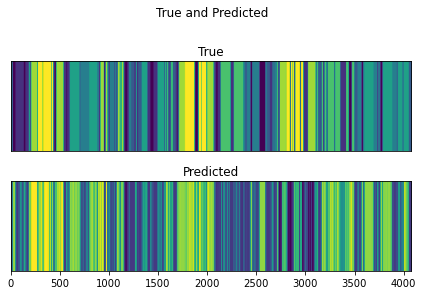

0.2729948491537896


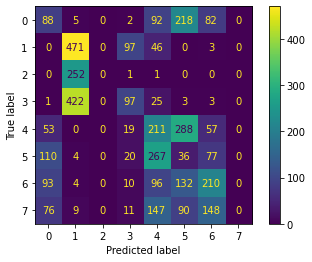

huawei_raw_hmm_recurrent_robust_ar_10000_10000_random


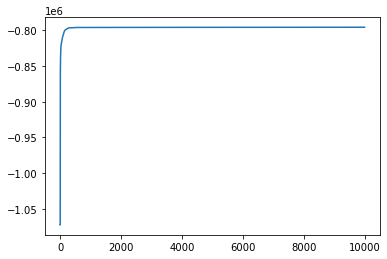

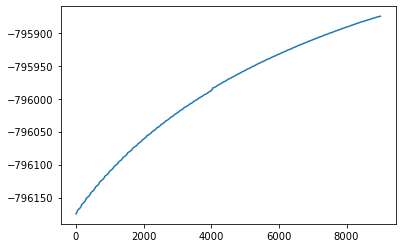

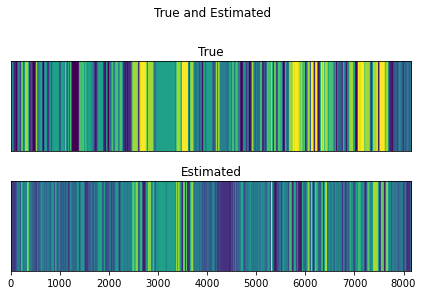

0.2716125076640098


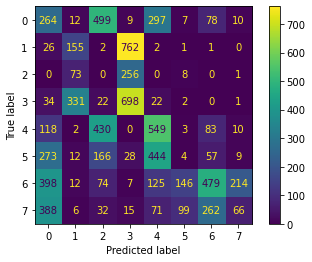

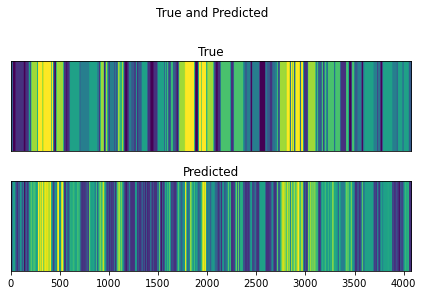

0.3367672308069659


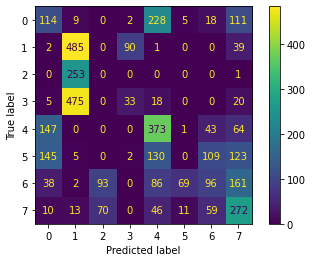

huawei_raw_hmm_recurrent_diagonal_robust_ar_10000_10000_random


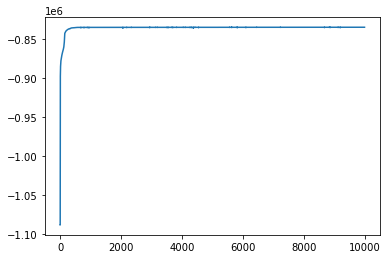

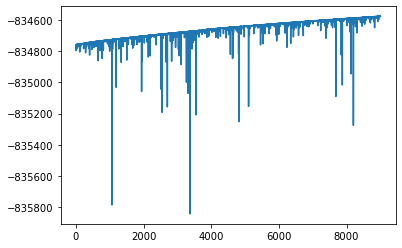

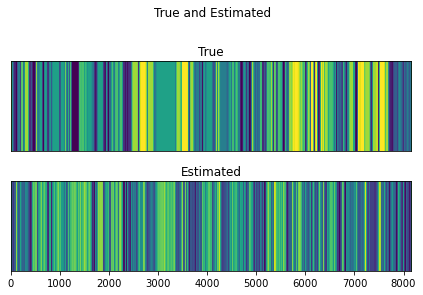

0.061557326793378296


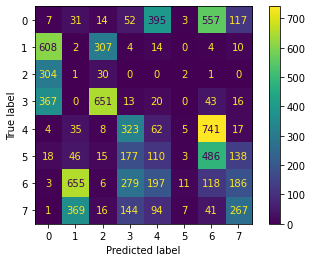

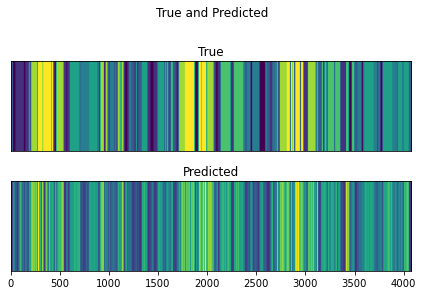

0.4321805248957567


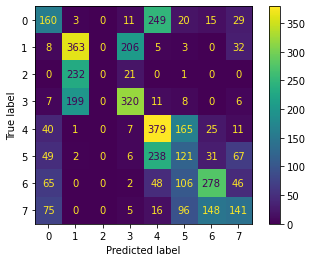

huawei_raw_hmm_standard_no_input_ar_10000_10000_kmeans


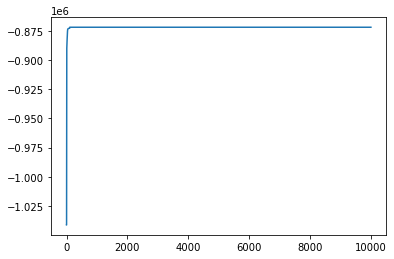

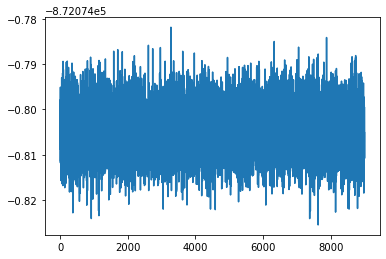

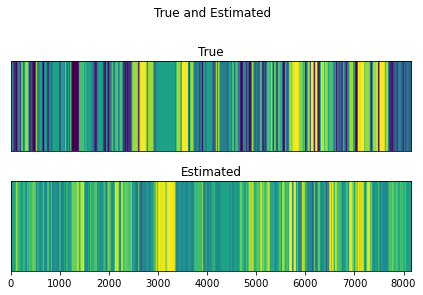

0.06609442060085836


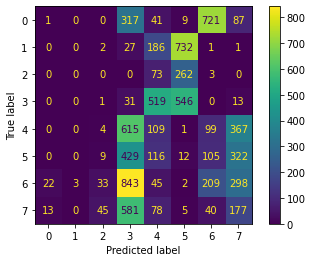

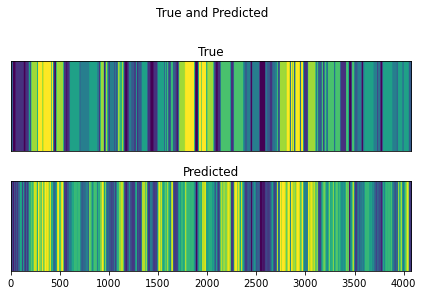

0.39195486877606084


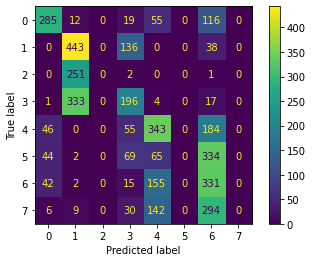

huawei_raw_hmm_standard_autoregressive_10000_10000_kmeans


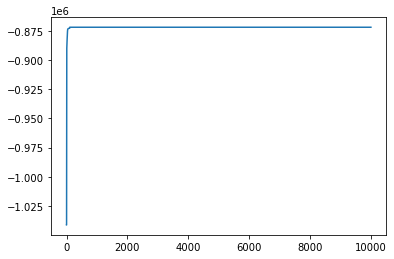

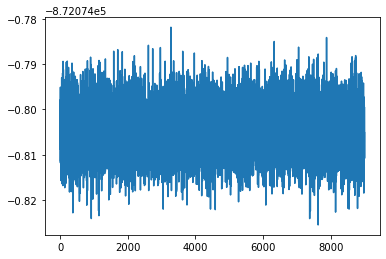

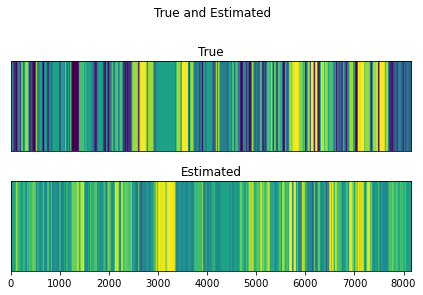

0.06609442060085836


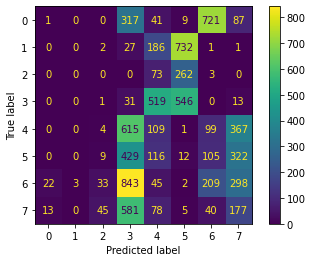

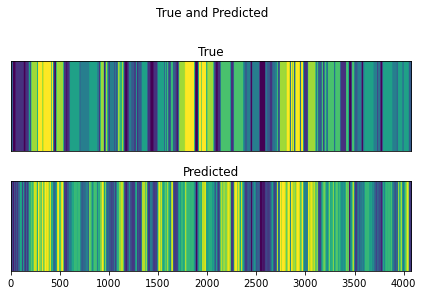

0.39195486877606084


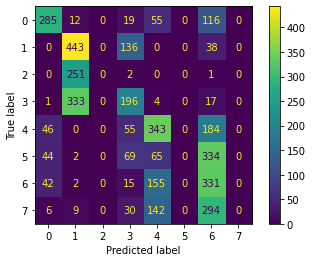

huawei_raw_hmm_standard_gaussian_10000_10000_random


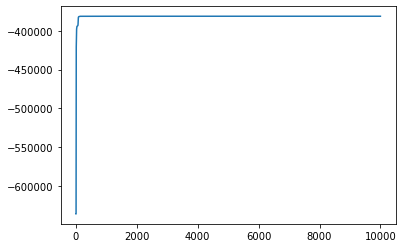

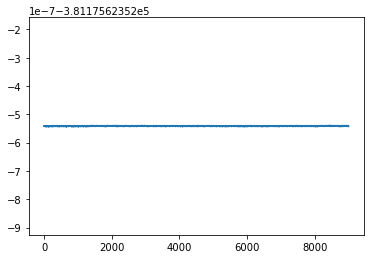

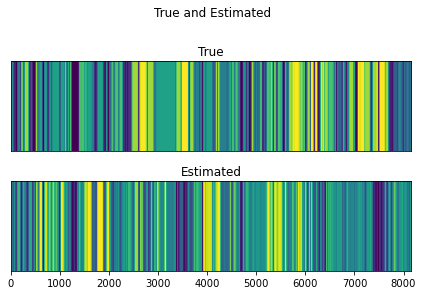

0.13353770692826486


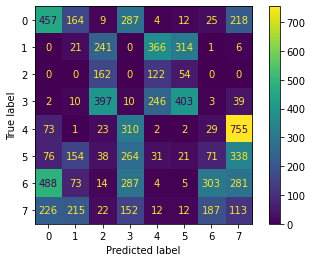

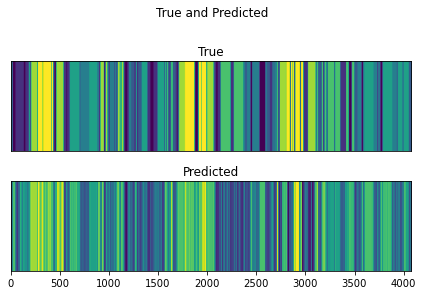

0.30806965906303657


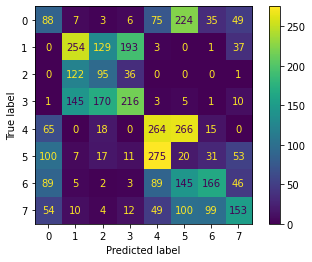

huawei_raw_hmm_standard_diagonal_ar_10000_10000_kmeans


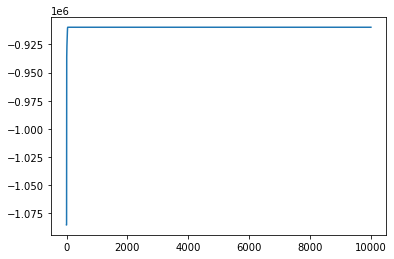

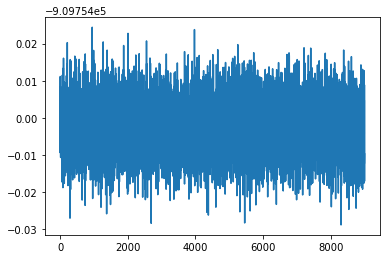

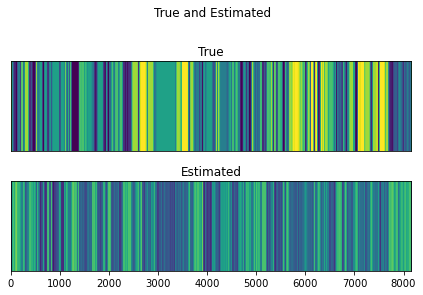

0.039975475168608214


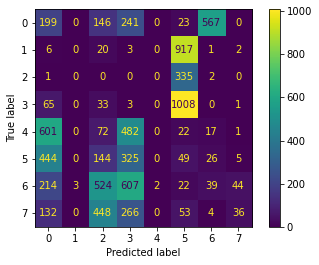

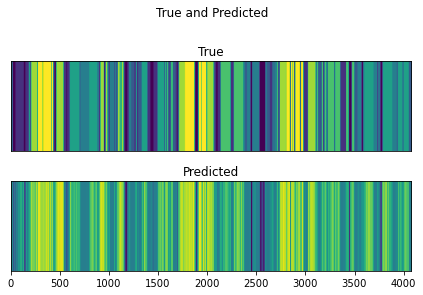

0.37650233014471424


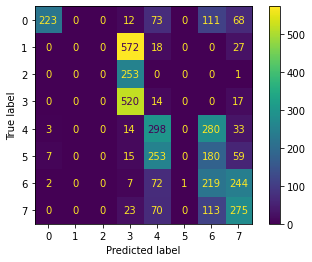

In [16]:
for f_name, model_dic in models_dic.items():
    prefix = f_name[:-7]
    print(prefix)
    model = model_dic["arhmm"]
    lls = model_dic["hmm_lls"]
    most_likely = model_dic["most_likely"]
    plt.plot(lls)
    plt.show()
    l = len(lls) // 10
    plt.plot(lls[l:])
    plt.show()
    plot_states(y_train, most_likely, "Estimated", prefix)
    print(accuracy_score(y_train, most_likely))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_train, most_likely))
    disp.plot()
    plt.show()
    y_predicted = model.most_likely_states(X_val)
    plot_states(y_val, y_predicted, "Predicted", prefix)
    print(accuracy_score(y_val, y_predicted))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_predicted))
    disp.plot()
    plt.show()

In [17]:
"test"

'test'

In [18]:
plot_states(y_train, models[0]["most_likely"], "estimated", 0 )

NameError: name 'models' is not defined

In [ ]:
accuracy_score(y_train, models[1]["most_likely"])

In [ ]:
confusion_matrix(y_train, models[1]["most_likely"])

In [ ]:
posterior_x = posterior.mean_continuous_states[0]
most_likely = rslds.most_likely_states(posterior_x, X_train)

In [ ]:
y_train

In [ ]:
# try:
perm = find_permutation(y_train.astype(int), most_likely)
rslds.permute(perm)
# except:
#     logging.error("Prediction exception")

In [ ]:
z_est = rslds.most_likely_states(posterior_x, X_train)
plot_states(y_train, z_est, "Predicted", 0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_train, z_est)

In [ ]:
confusion_matrix(y_train, z_est)

In [ ]:
print(models[0]['hmm_lls'])

In [ ]:
plt.plot(models[1]['hmm_lls'][1000:])

In [ ]:
"test"